<a href="https://colab.research.google.com/github/yashpatil-1/Machine-Learning-LAB/blob/main/ML_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import necessary libraries
import pandas as pd

# Load Employee_Salaries.csv file
employee_data = pd.read_csv('/content/Employee_Salaries.csv')

# Display the first few rows of the dataset
print("Employee Salaries Data:")
print(employee_data.head())

# Check for missing values
print("\nMissing values in Employee Salaries Data:")
print(employee_data.isnull().sum())


Employee Salaries Data:
  Department            Department_Name                        Division  \
0        ABS  Alcohol Beverage Services           ABS 85 Administration   
1        ABS  Alcohol Beverage Services           ABS 85 Administration   
2        ABS  Alcohol Beverage Services           ABS 85 Administration   
3        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   
4        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   

  Gender  Base_Salary  Overtime_Pay  Longevity_Pay Grade  
0      M   175873.000          0.00            0.0    M2  
1      M   145613.360          0.00            0.0    M3  
2      F   136970.000          0.00            0.0    M3  
3      F    89432.694          0.00         2490.0    21  
4      F    78947.000        456.68         6257.7    16  

Missing values in Employee Salaries Data:
Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay      

In [7]:
# Basic summary of Employee Salaries data
print("\nSummary of Employee Salaries Data:")
print(employee_data.describe())



Summary of Employee Salaries Data:
         Base_Salary   Overtime_Pay  Longevity_Pay
count   10291.000000   10291.000000   10291.000000
mean    90312.165744    8081.288954    1533.882816
std     31240.842929   16491.833017    3209.041070
min     11147.240000       0.000000       0.000000
25%     70023.000000       0.000000       0.000000
50%     87328.000000     258.420000       0.000000
75%    108084.000000    9190.970000    1225.680000
max    292000.000000  227428.990000   20279.460000


In [9]:
# Check for missing values
print("\nMissing values in Employee Salaries Data:")
print(employee_data.isnull().sum())



Missing values in Employee Salaries Data:
Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64


In [10]:
# Basic summary of Employee Salaries data
print("\nSummary of Employee Salaries Data:")
print(employee_data.describe())



Summary of Employee Salaries Data:
         Base_Salary   Overtime_Pay  Longevity_Pay
count   10291.000000   10291.000000   10291.000000
mean    90312.165744    8081.288954    1533.882816
std     31240.842929   16491.833017    3209.041070
min     11147.240000       0.000000       0.000000
25%     70023.000000       0.000000       0.000000
50%     87328.000000     258.420000       0.000000
75%    108084.000000    9190.970000    1225.680000
max    292000.000000  227428.990000   20279.460000


<ipython-input-11-d0727e033b0f>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=employee_data, x='Department', y='Base_Salary', ci=None)


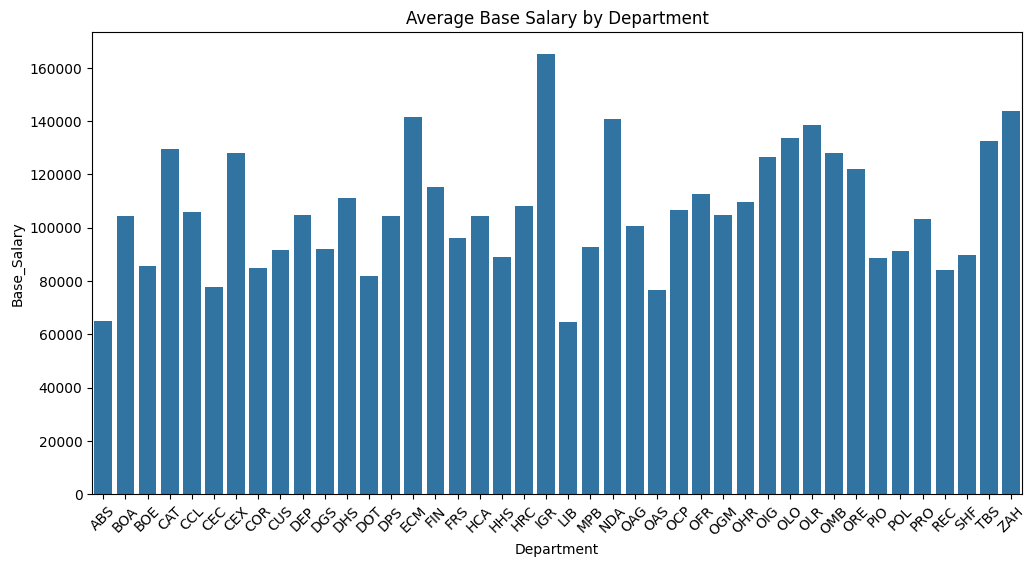

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for average Base Salary by Department
plt.figure(figsize=(12, 6))
sns.barplot(data=employee_data, x='Department', y='Base_Salary', ci=None)
plt.title("Average Base Salary by Department")
plt.xticks(rotation=45)
plt.show()


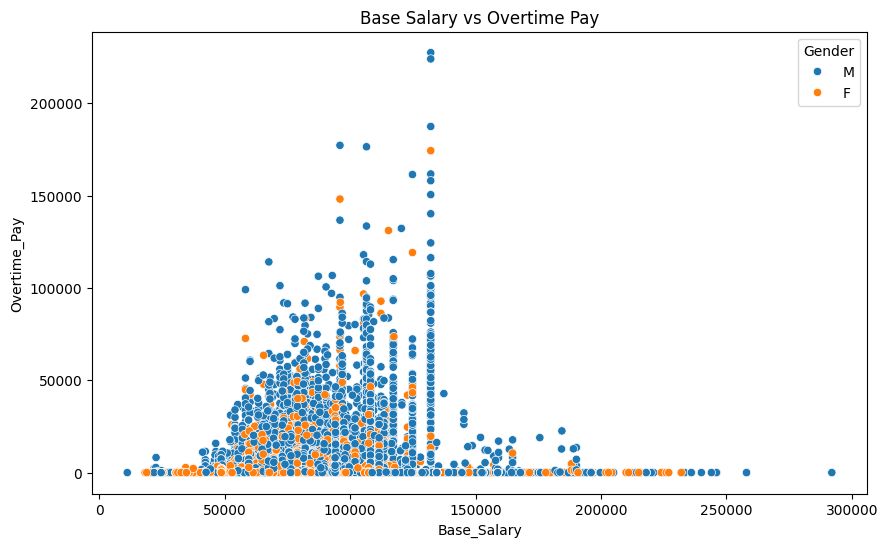

In [12]:
# Scatter plot to show Base Salary vs Overtime Pay
plt.figure(figsize=(10, 6))
sns.scatterplot(data=employee_data, x='Base_Salary', y='Overtime_Pay', hue='Gender')
plt.title("Base Salary vs Overtime Pay")
plt.show()


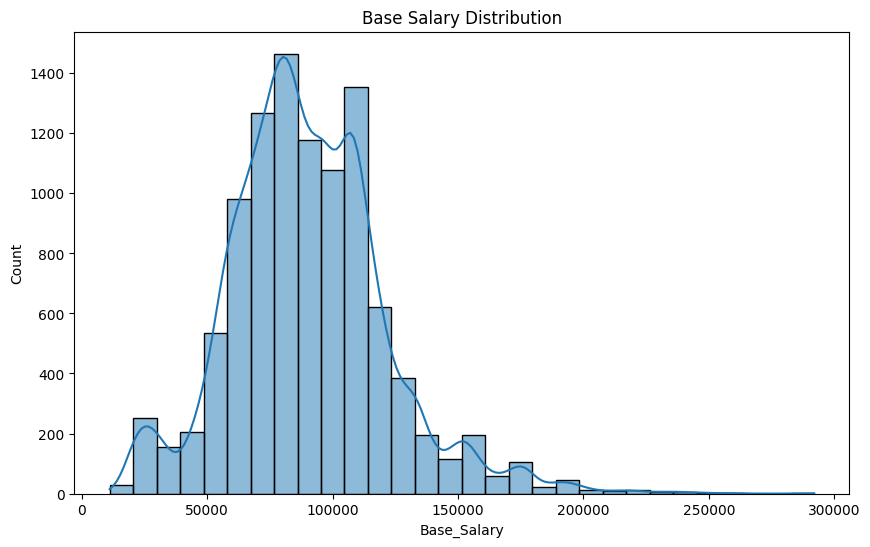

In [14]:
# Histogram to show Base Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(employee_data['Base_Salary'], kde=True, bins=30)
plt.title("Base Salary Distribution")
plt.show()


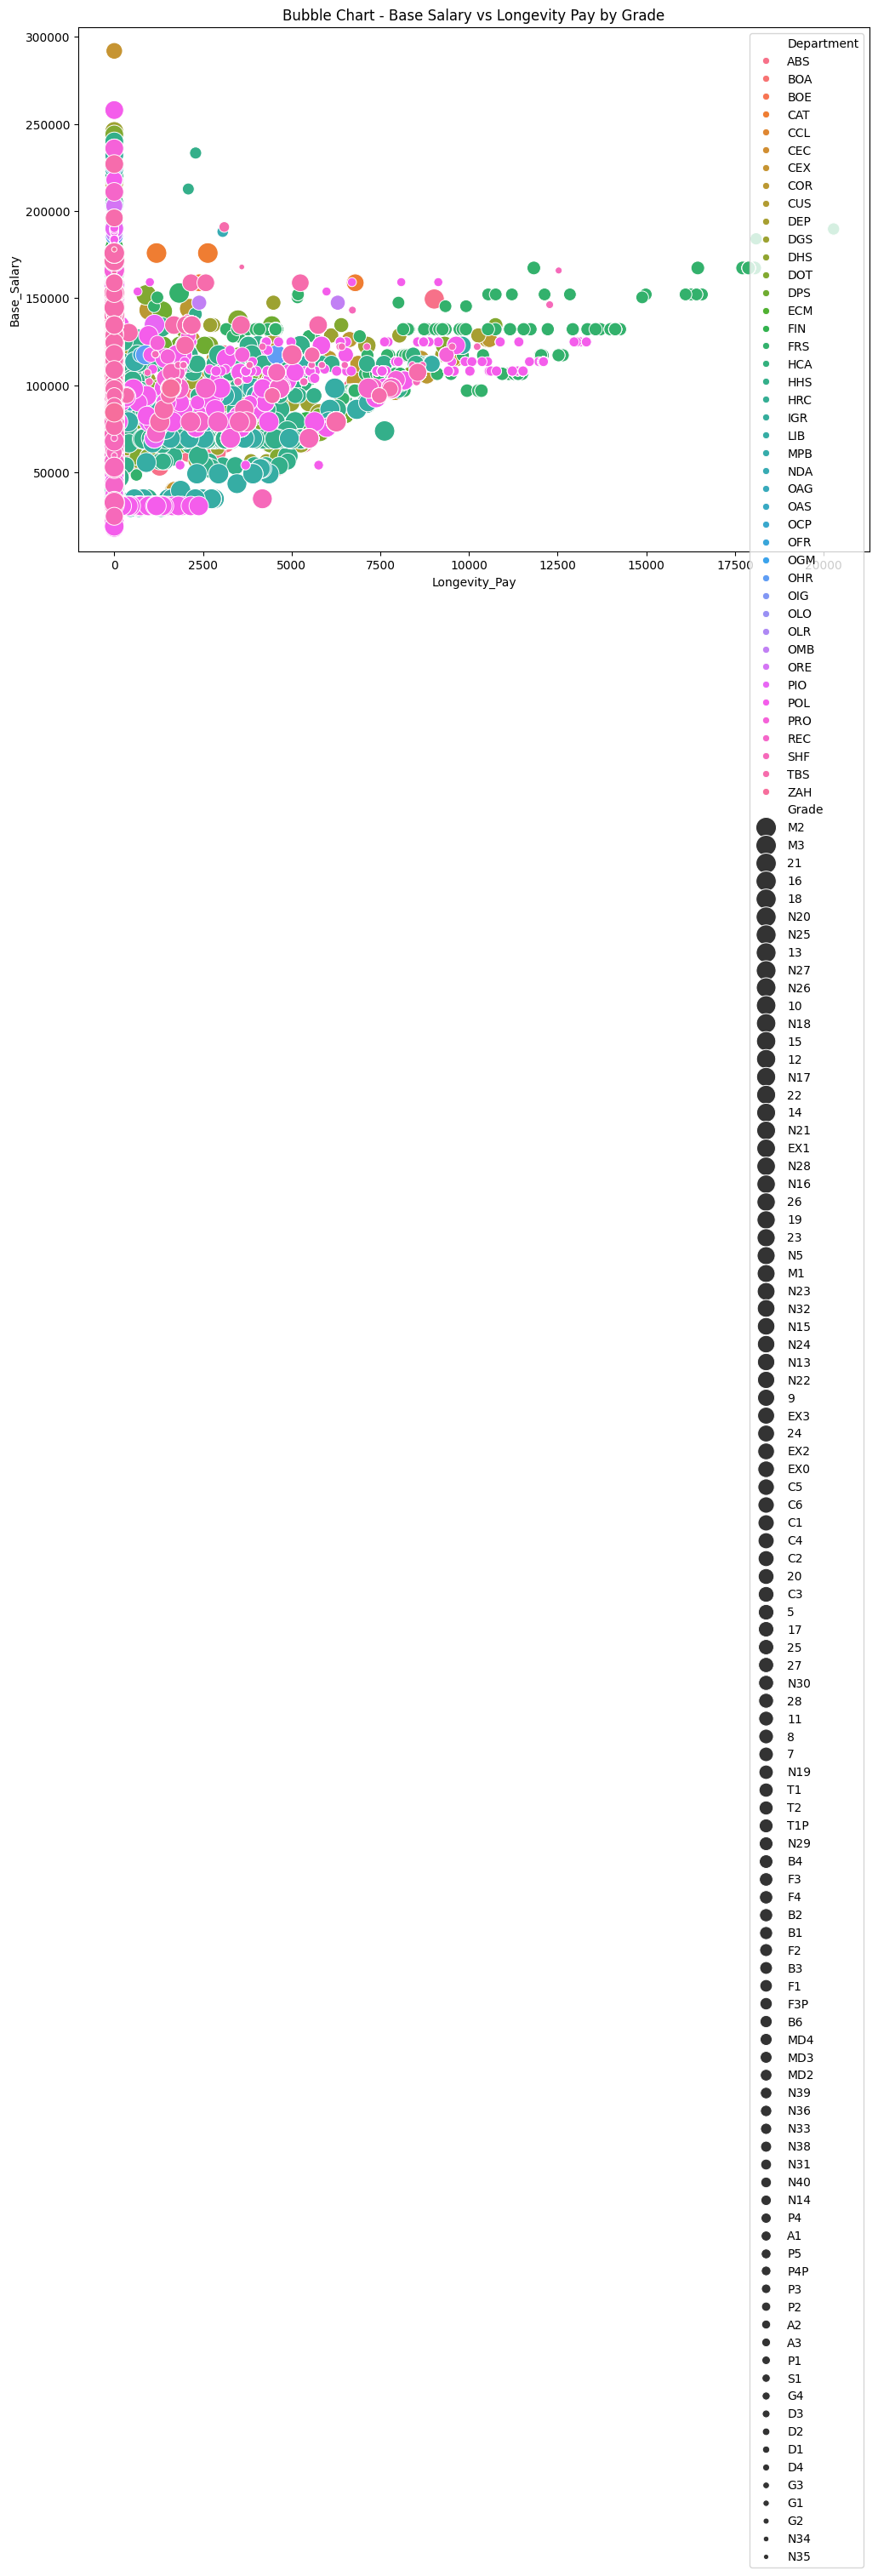

In [18]:
# Bubble chart for Base Salary vs Longevity Pay by Grade
plt.figure(figsize=(12, 8))
sns.scatterplot(data=employee_data, x='Longevity_Pay', y='Base_Salary', size='Grade', hue='Department', sizes=(20, 300))
plt.title("Bubble Chart - Base Salary vs Longevity Pay by Grade")
plt.show()

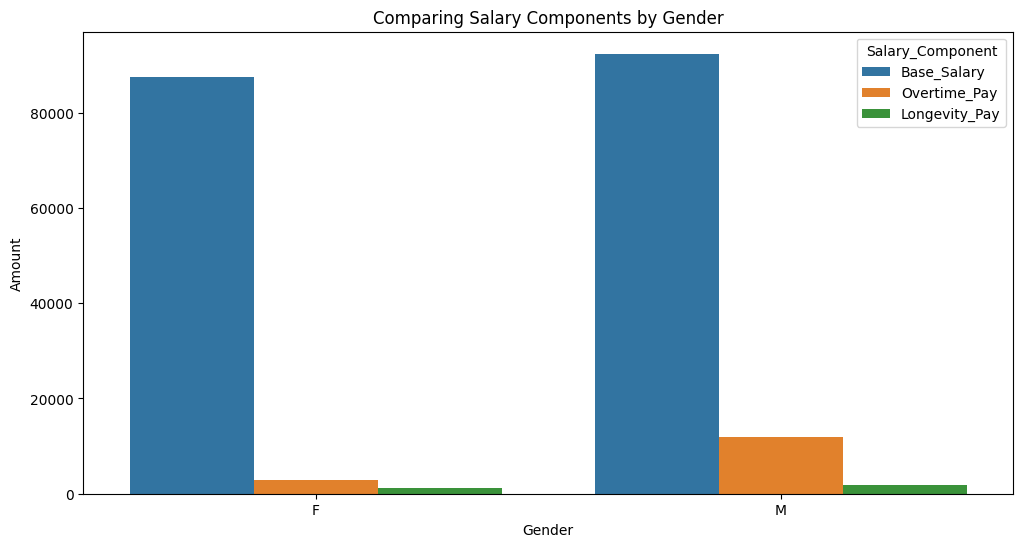

In [16]:
# Grouping by Gender to calculate average Base Salary, Overtime Pay, and Longevity Pay
gender_salary = employee_data.groupby('Gender')[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']].mean().reset_index()

# Melt the DataFrame for easier plotting
salary_melted = gender_salary.melt(id_vars='Gender', var_name='Salary_Component', value_name='Amount')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=salary_melted, x='Gender', y='Amount', hue='Salary_Component')
plt.title("Comparing Salary Components by Gender")
plt.show()

<ipython-input-19-ed86b1a23cca>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=employee_data, x='Division', y='Base_Salary', ci=None)


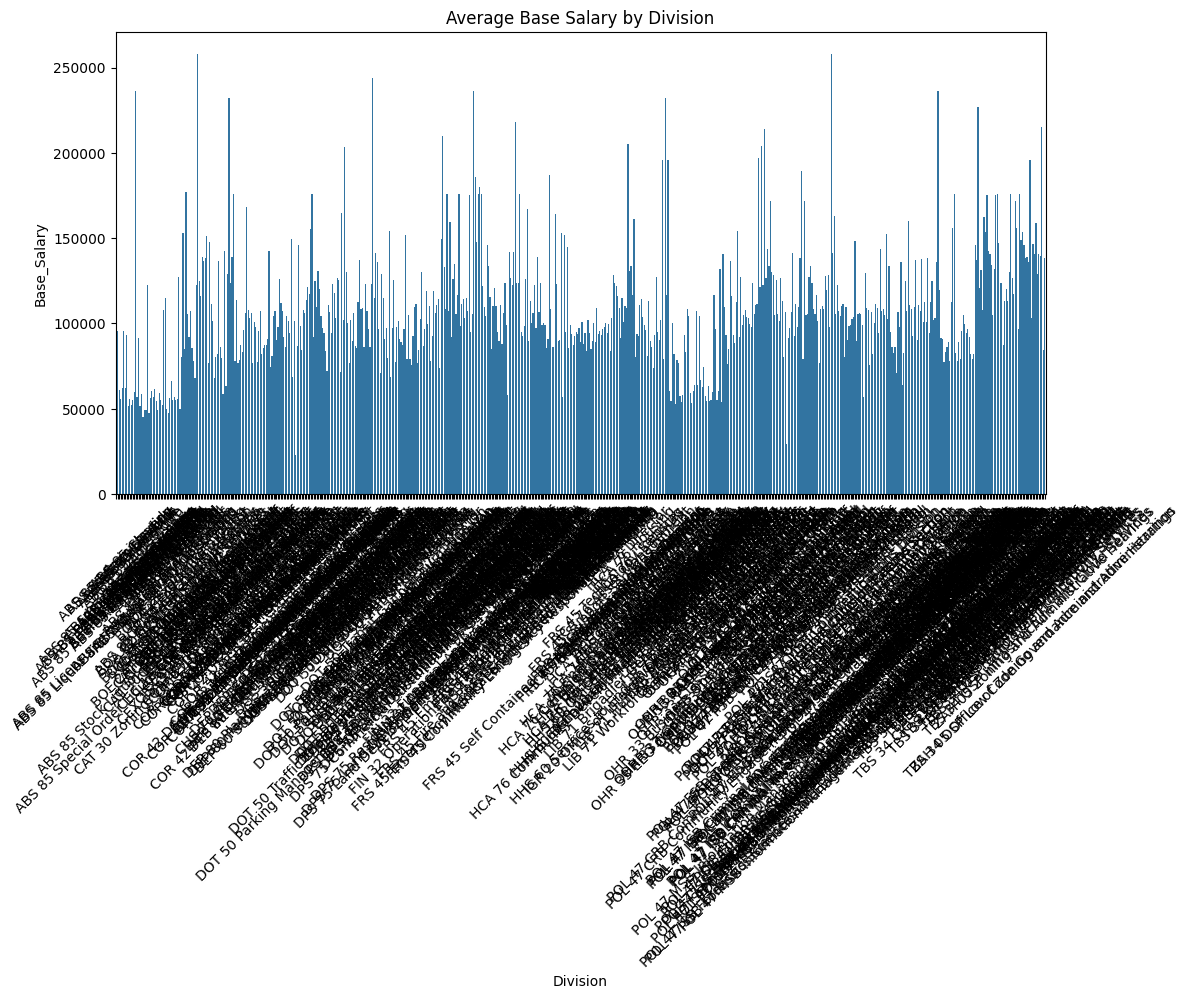

In [19]:
# Column chart to compare average salary by Division
plt.figure(figsize=(12, 6))
sns.barplot(data=employee_data, x='Division', y='Base_Salary', ci=None)
plt.title("Average Base Salary by Division")
plt.xticks(rotation=45)
plt.show()


In [26]:
import plotly.express as px

# Group data by Department and sum Base Salary
dept_salary = employee_data.groupby('Department')['Base_Salary'].sum().reset_index()

# Create Treemap Chart
fig = px.treemap(dept_salary, path=['Department'], values='Base_Salary', title="Treemap of Salary Distribution by Department")
fig.show()


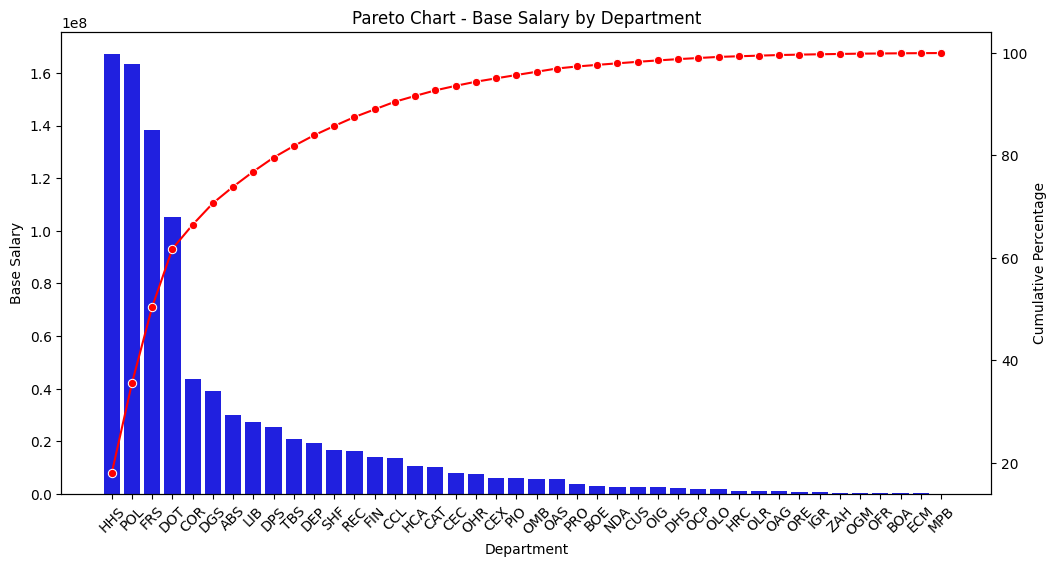

In [27]:
# Sort by Base Salary
dept_salary_sorted = dept_salary.sort_values(by='Base_Salary', ascending=False)
dept_salary_sorted['Cumulative_Percentage'] = dept_salary_sorted['Base_Salary'].cumsum() / dept_salary_sorted['Base_Salary'].sum() * 100

# Plot Pareto Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=dept_salary_sorted, x='Department', y='Base_Salary', color='b')
plt.xticks(rotation=45)
plt.ylabel("Base Salary")
plt.title("Pareto Chart - Base Salary by Department")

# Plot cumulative percentage
plt.twinx()
sns.lineplot(data=dept_salary_sorted, x='Department', y='Cumulative_Percentage', color='r', marker='o')
plt.ylabel("Cumulative Percentage")
plt.show()


In [23]:
# Sample Candlestick Chart using Plotly
import plotly.graph_objects as go

# Example data
candlestick_data = employee_data[['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']].sample(10)

# Plot Candlestick Chart
fig = go.Figure(data=[go.Candlestick(
    x=candlestick_data.index,
    open=candlestick_data['Base_Salary'],
    high=candlestick_data['Base_Salary'] + candlestick_data['Overtime_Pay'],
    low=candlestick_data['Base_Salary'] - candlestick_data['Longevity_Pay'],
    close=candlestick_data['Base_Salary']
)])
fig.show()


In [29]:
import plotly.graph_objects as go

# Prepare sample data
salary_components = {
    'Component': ['Base Salary', 'Overtime Pay', 'Longevity Pay'],
    'Amount': [
        employee_data['Base_Salary'].mean(),
        employee_data['Overtime_Pay'].mean(),
        employee_data['Longevity_Pay'].mean()
    ]
}

# Create Waterfall Chart
fig = go.Figure(go.Waterfall(
    x=salary_components['Component'],
    y=salary_components['Amount'],
    connector=dict(line=dict(color="rgb(63, 63, 63)"))
))

fig.update_layout(title="Waterfall Chart - Salary Components Breakdown")
fig.show()


<ipython-input-28-be455d60bfd1>:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




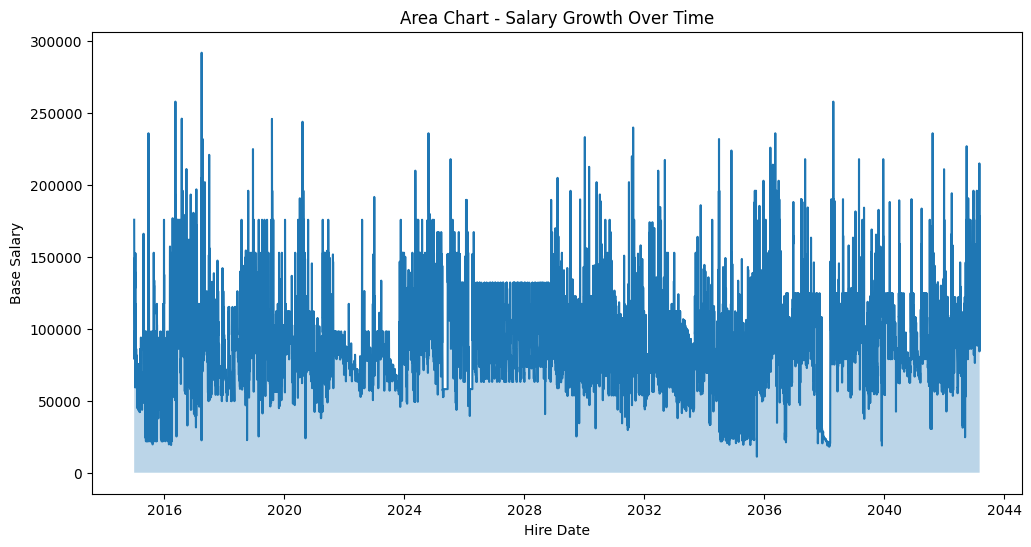

In [28]:
# Create a sample Hire Date column if it doesn't exist
if 'Hire Date' not in employee_data.columns:
    employee_data['Hire Date'] = pd.date_range(start='1/1/2015', periods=len(employee_data))

# Convert Hire Date to datetime
employee_data['Hire Date'] = pd.to_datetime(employee_data['Hire Date'])

# Plot Area Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=employee_data, x='Hire Date', y='Base_Salary', ci=None)
plt.fill_between(employee_data['Hire Date'], employee_data['Base_Salary'], alpha=0.3)
plt.title("Area Chart - Salary Growth Over Time")
plt.xlabel("Hire Date")
plt.ylabel("Base Salary")
plt.show()
